<a href="https://colab.research.google.com/github/martydom/startup-funding-prediction/blob/main/Devashish_Bose_Team_1_Startup_Funding_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/data_driven_investment_1.csv')

In [ ]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0


## Missing Values curve

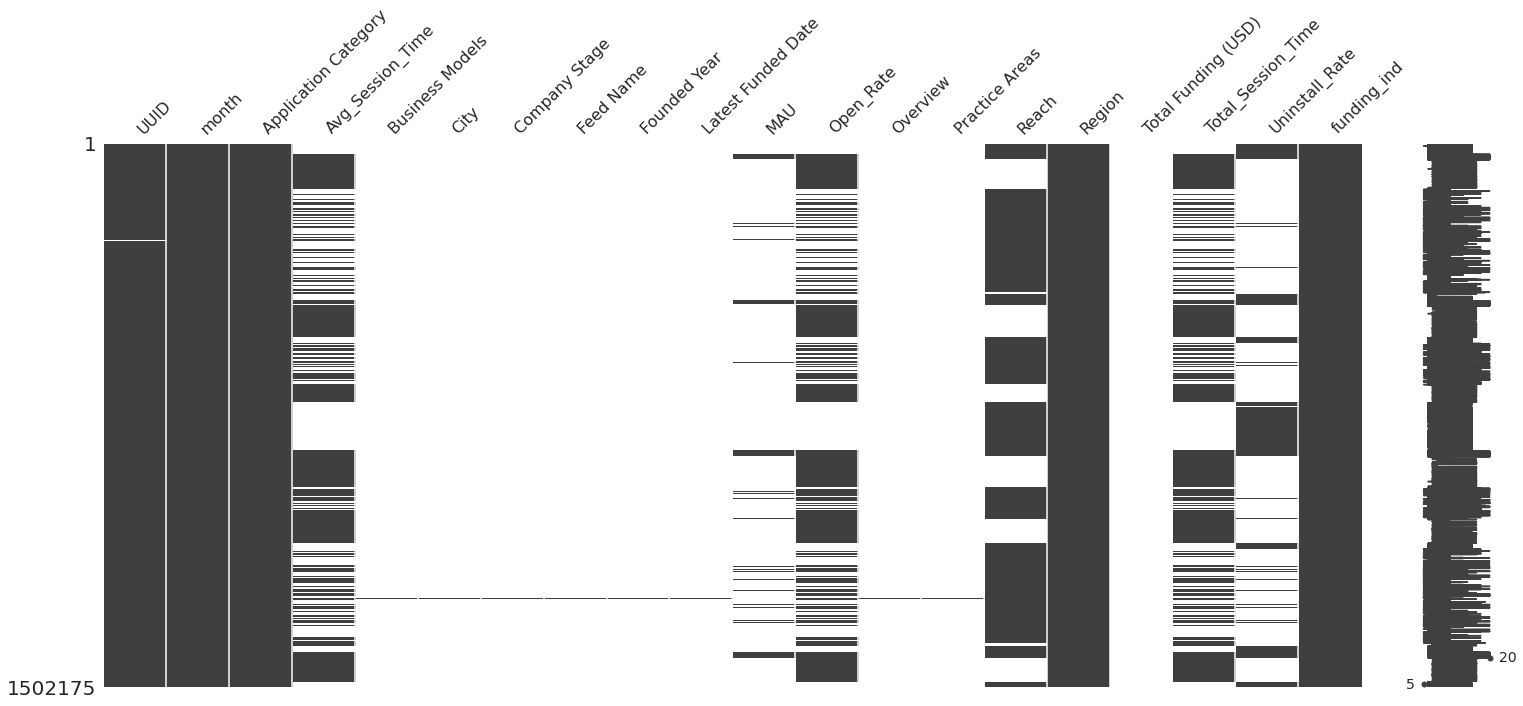

In [ ]:
import missingno as msno
msno.matrix(df)

# We see a lot of missing values

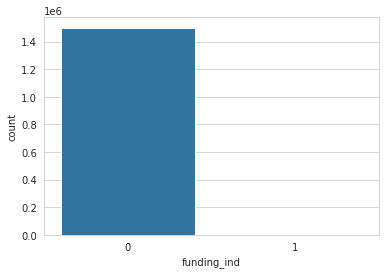

In [ ]:
ax=sns.countplot(df['funding_ind'])


## **Funding indicator shows the startups that got fundings in corrosponding Months**

It shows High imbalance less then 0.1% Startups are funded which makes sense .

In [ ]:
df['Region'].value_counts()

National    1502175
Name: Region, dtype: int64

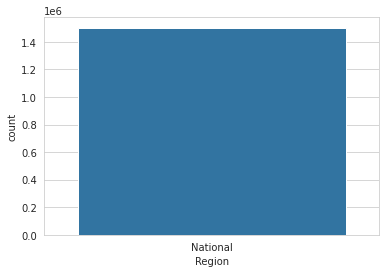

In [ ]:
sns.countplot(df['Region'])

# So, Region column contains only a single value i.e National

In [ ]:
df.drop_duplicates(inplace = True)

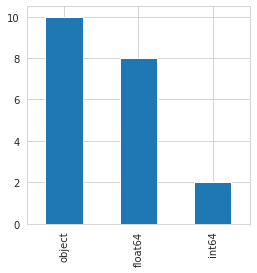

In [ ]:
plt.figure(figsize=(4,4))
df.dtypes.value_counts().plot(kind='bar')

In [ ]:
# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
# this column will be useful in analysis and visualization
df['Month'] = df['month'].astype('string').apply(lambda x: (str(x)[4:6]))

In [ ]:
df['Month'] = df['Month'].astype('int')

In [ ]:
import datetime

In [ ]:
df['Month_Name'] = df['Month'].apply(lambda x: datetime.date(1900, x, 1).strftime('%b'))

[Text(0, 0.5, 'No of Startups Funded'), Text(0.5, 0, 'Months')]

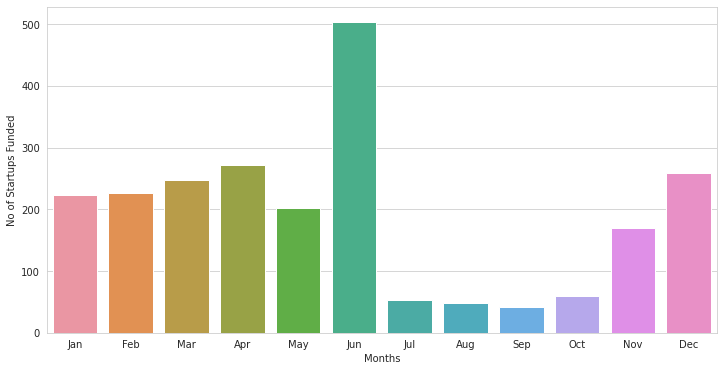

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.countplot(df[df['funding_ind']==1].sort_values('Month')['Month_Name'],)
ax. set(xlabel='Months',ylabel='No of Startups Funded')

In [ ]:
import datetime
sns.set_style("darkgrid")

In [ ]:
df.head(2)

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month_Name
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0,8,Aug
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0,8,Aug


In [ ]:
app_cate=df.groupby(['Application Category']).mean()
app_cate

,month,Avg_Session_Time,Founded Year,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month
Application Category,,,,,,,,,,,
Action,2.019688e+07,3.775744,2013.760000,0.562335,3.890461,0.000446,3.719464e+07,13.457822,0.399763,0.001014,5.417278
Adventure,2.019767e+07,3.764194,2010.928571,0.539235,4.117658,0.000095,9.796928e+07,13.716950,0.366147,0.001130,5.211957
Arcade,2.019692e+07,3.118481,2014.000000,0.521299,3.936688,0.000374,2.500000e+08,11.564252,0.294538,0.000163,5.324154
Art & Design,2.019758e+07,1.192760,NaN,0.391955,4.438883,0.000093,NaN,5.228110,0.212710,0.000000,5.165082
Auto & Vehicles,2.019732e+07,1.490391,2012.914286,0.364889,3.636994,0.000577,1.643200e+08,5.073861,0.145576,0.003485,5.128261
Beauty,2.019802e+07,1.135585,2018.000000,0.414668,4.047631,0.000029,3.500000e+07,4.093132,0.227311,0.000310,5.012713
Board,2.019706e+07,4.203959,2007.857143,0.543663,3.657192,0.001017,7.644825e+07,14.682791,0.209934,0.000839,5.257314
Books & Reference,2.019682e+07,1.763371,2016.097222,0.363478,2.795250,0.000211,8.546244e+07,4.761607,0.084266,0.000974,5.262672
Business,2.019724e+07,0.951753,2014.199153,0.403197,4.720226,0.000434,1.839832e+08,4.673637,0.091960,0.002832,5.092375


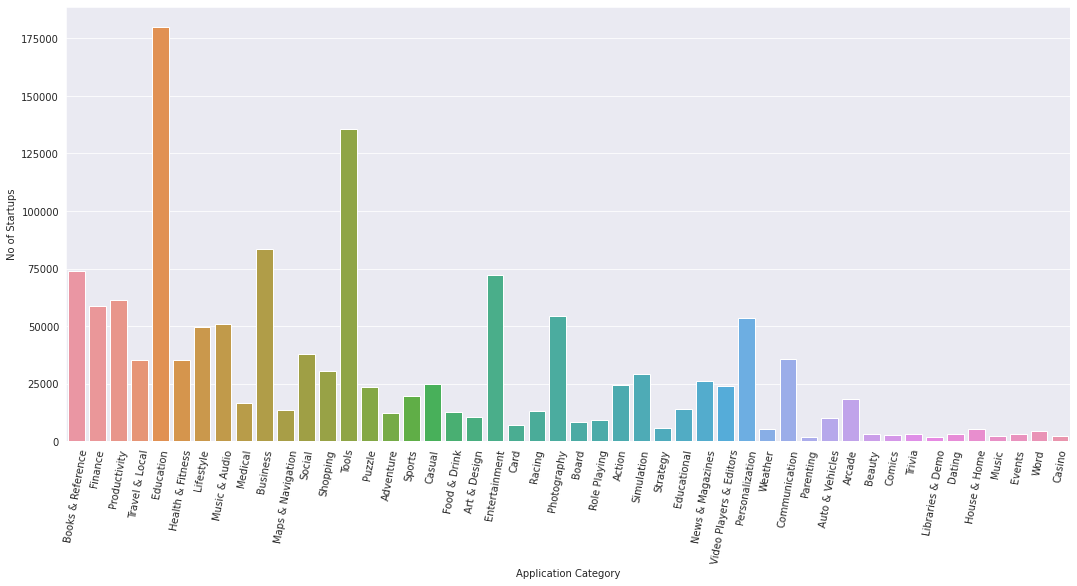

In [ ]:
plt.figure(figsize=(18,8))
ax=sns.countplot(df[df['funding_ind']==1]['Application Category'],color="b")
ax=sns.countplot(df['Application Category'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
ax. set(xlabel='Application Category',ylabel='No of Startups')
plt.show()

BoxPlots

In [ ]:
df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Business Models', 'City', 'Company Stage', 'Feed Name', 'Founded Year',
       'Latest Funded Date', 'MAU', 'Open_Rate', 'Overview', 'Practice Areas',
       'Reach', 'Region', 'Total Funding (USD)', 'Total_Session_Time',
       'Uninstall_Rate', 'funding_ind', 'Month', 'Month_Name'],
      dtype='object')

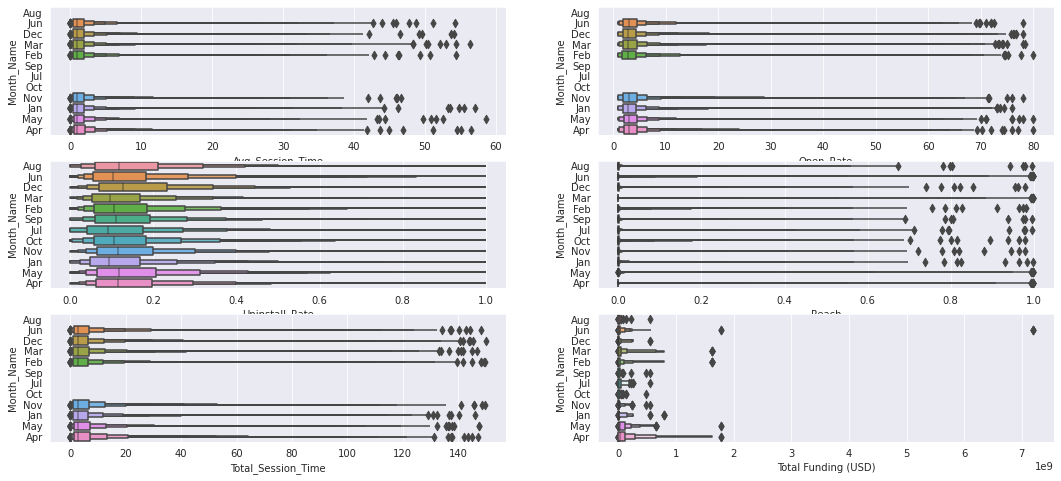

In [ ]:
ax1=plt.subplots(3, 2,figsize=(18,8))

ax1=plt.subplot(3, 2,1)
sns.boxenplot(x=df['Avg_Session_Time'],y=df['Month_Name'])
ax1=plt.subplot(3, 2,2)
sns.boxenplot(x=df['Open_Rate'],y=df['Month_Name'])
ax1=plt.subplot(3, 2,3)
sns.boxenplot(x=df['Uninstall_Rate'],y=df['Month_Name'])
ax1=plt.subplot(3, 2,4)
sns.boxenplot(x=df['Reach'],y=df['Month_Name'])
ax1=plt.subplot(3, 2,5)
sns.boxenplot(x=df['Total_Session_Time'],y=df['Month_Name'])
ax1=plt.subplot(3, 2,6)
sns.boxenplot(x=df['Total Funding (USD)'],y=df['Month_Name'])

Highly right skewed some outliers on the positive side

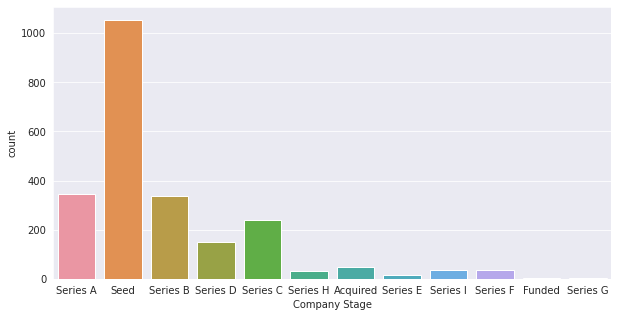

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df['Company Stage'])

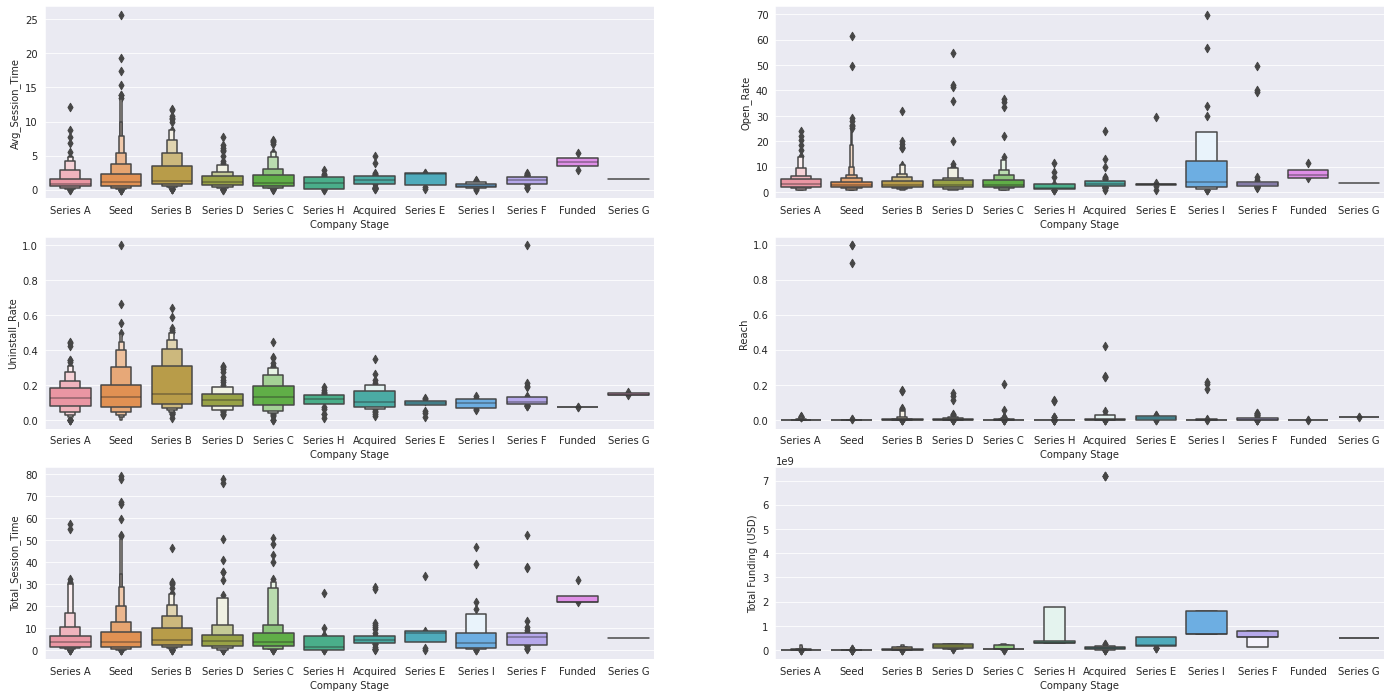

In [ ]:
ax1=plt.subplots(3, 2,figsize=(24,12))

ax1=plt.subplot(3, 2,1)
sns.boxenplot(y=df['Avg_Session_Time'],x=df['Company Stage'])
ax1=plt.subplot(3, 2,2)
sns.boxenplot(y=df['Open_Rate'],x=df['Company Stage'])
ax1=plt.subplot(3, 2,3)
sns.boxenplot(y=df['Uninstall_Rate'],x=df['Company Stage'])
ax1=plt.subplot(3, 2,4)
sns.boxenplot(y=df['Reach'],x=df['Company Stage'])
ax1=plt.subplot(3, 2,5)
sns.boxenplot(y=df['Total_Session_Time'],x=df['Company Stage'])
ax1=plt.subplot(3, 2,6)
sns.boxenplot(y=df['Total Funding (USD)'],x=df['Company Stage'])

In [ ]:
df[df['Company Stage']=='Funded']

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month_Name
639245,ac3ffb22711f513ab9afffcea339336d7dadeb68,20200601,Education,5.414305,Continued Learning > Professional > Online Lea...,Mumbai,Funded,Continued Learning\nCorporate Learning,2015.0,2020-08-07,0.325581,5.753623,Online higher education programs for working p...,EdTech\nEdTech,0.000073,National,NaN,21.692452,0.074074,1,6,Jun
639246,ac3ffb22711f513ab9afffcea339336d7dadeb68,20200601,Education,2.846499,Continued Learning > Professional > Online Lea...,Mumbai,Funded,Continued Learning\nCorporate Learning,2015.0,2020-08-07,NaN,5.500000,Online higher education programs for working p...,EdTech\nEdTech,0.000059,National,NaN,21.606269,NaN,1,6,Jun
1018001,ac3ffb22711f513ab9afffcea339336d7dadeb68,20200501,Education,3.632588,Continued Learning > Professional > Online Lea...,Mumbai,Funded,Continued Learning\nCorporate Learning,2015.0,2020-08-07,0.290323,7.586207,Online higher education programs for working p...,EdTech\nEdTech,0.000163,National,NaN,21.906979,0.071429,1,5,May
1018002,ac3ffb22711f513ab9afffcea339336d7dadeb68,20200501,Education,4.399159,Continued Learning > Professional > Online Lea...,Mumbai,Funded,Continued Learning\nCorporate Learning,2015.0,2020-08-07,NaN,11.615385,Online higher education programs for working p...,EdTech\nEdTech,0.000184,National,NaN,31.948967,NaN,1,5,May


## *Most Start-ups are seed funded and now looking for first big series A investement*


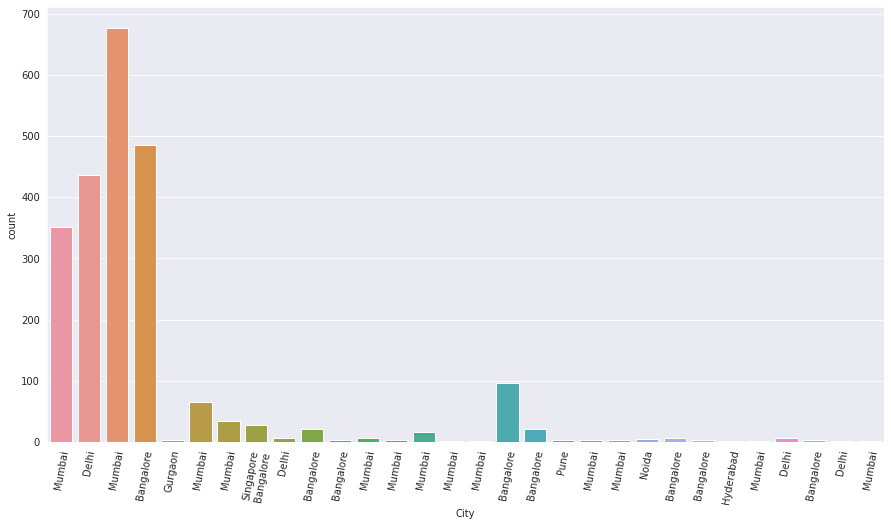

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df['City']).set_xticklabels(fontdict={'fontsize':10}, 
                                                    labels=df['City'].dropna(),rotation=80)
plt.show()

In [ ]:
def pie_plot(col, data):
  plt.rcParams['figure.figsize'] = (35, 12)

  a = pd.DataFrame(data[col].value_counts())
  sns.set_style('darkgrid')
  ax2 = plt.subplot(122)
  explode =(0.08,0,0.1,0, 0.1,0,0.1,0, 0.1, 0)
  plt.pie(a.sort_values([col], ascending=False).head(10), labels=a.sort_values([col], ascending=False).head(10).index, startangle=50, shadow = True, explode = explode)
  ax2.set_title(f'Top 10 {col}', fontsize = 20)
  plt.legend(loc='left',
            fontsize=8)

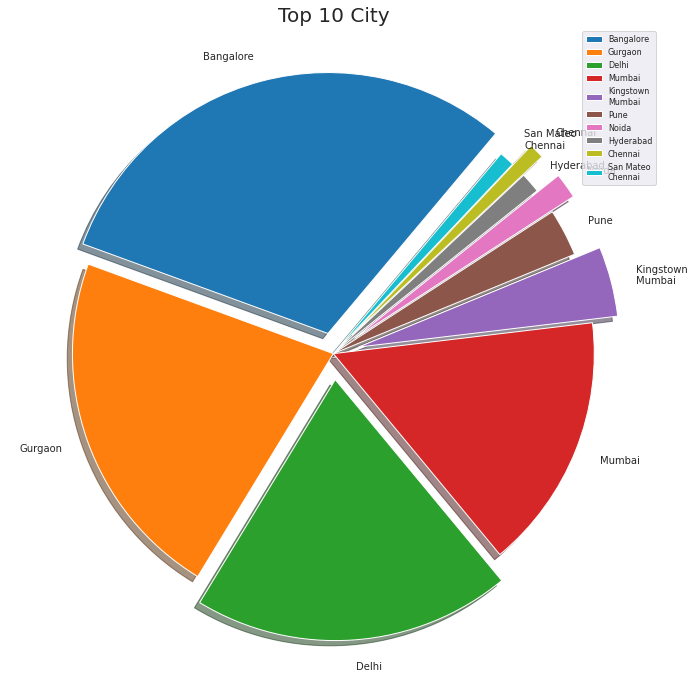

In [ ]:
pie_plot('City', df)

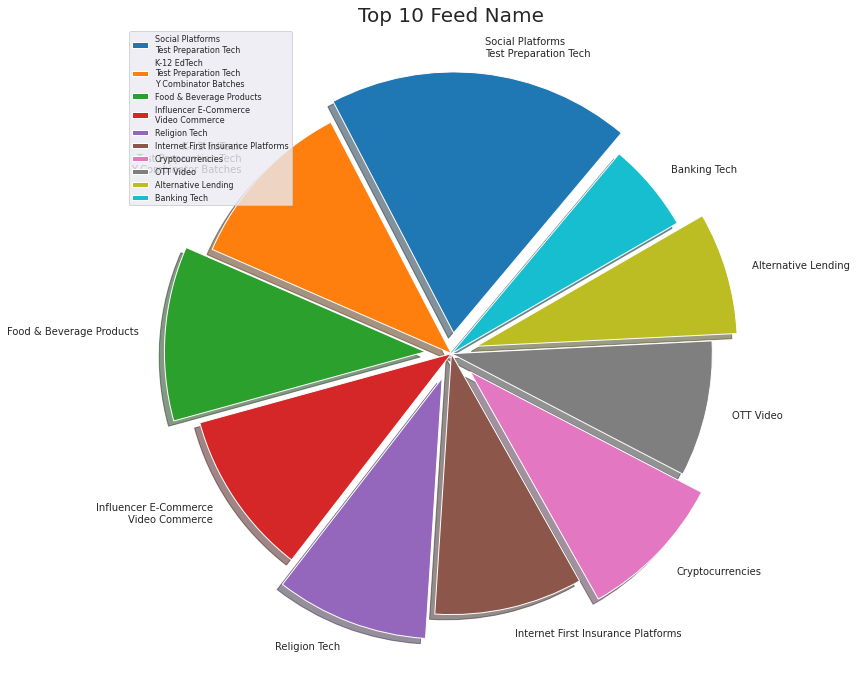

In [ ]:
pie_plot('Feed Name', df)

# Business models and feed name are similar feature which are explaining the type of business.

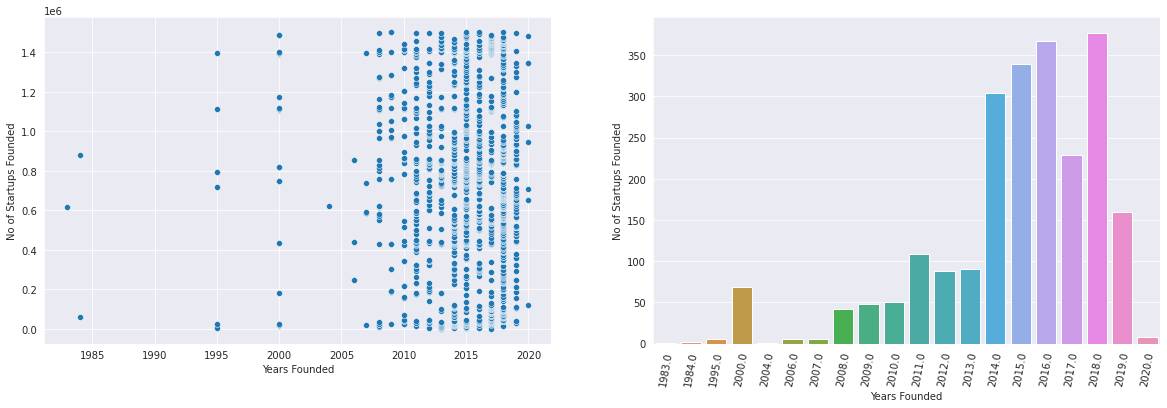

In [ ]:
plt.subplots(1,2,figsize=(20,6))
plt.subplot(1,2,1)
ax=sns.scatterplot(x=df['Founded Year'],y=df.index)
ax. set(xlabel='Years Founded',ylabel='No of Startups Founded')
plt.subplot(1,2,2)
ax=sns.countplot(df['Founded Year'].dropna())
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
ax. set(xlabel='Years Founded',ylabel='No of Startups Founded')
plt.show()

Most of the startups are founded in the recent years.

In [ ]:
funded_df = df[df['funding_ind']==1]
not_funded_df = df[df['funding_ind']==0]

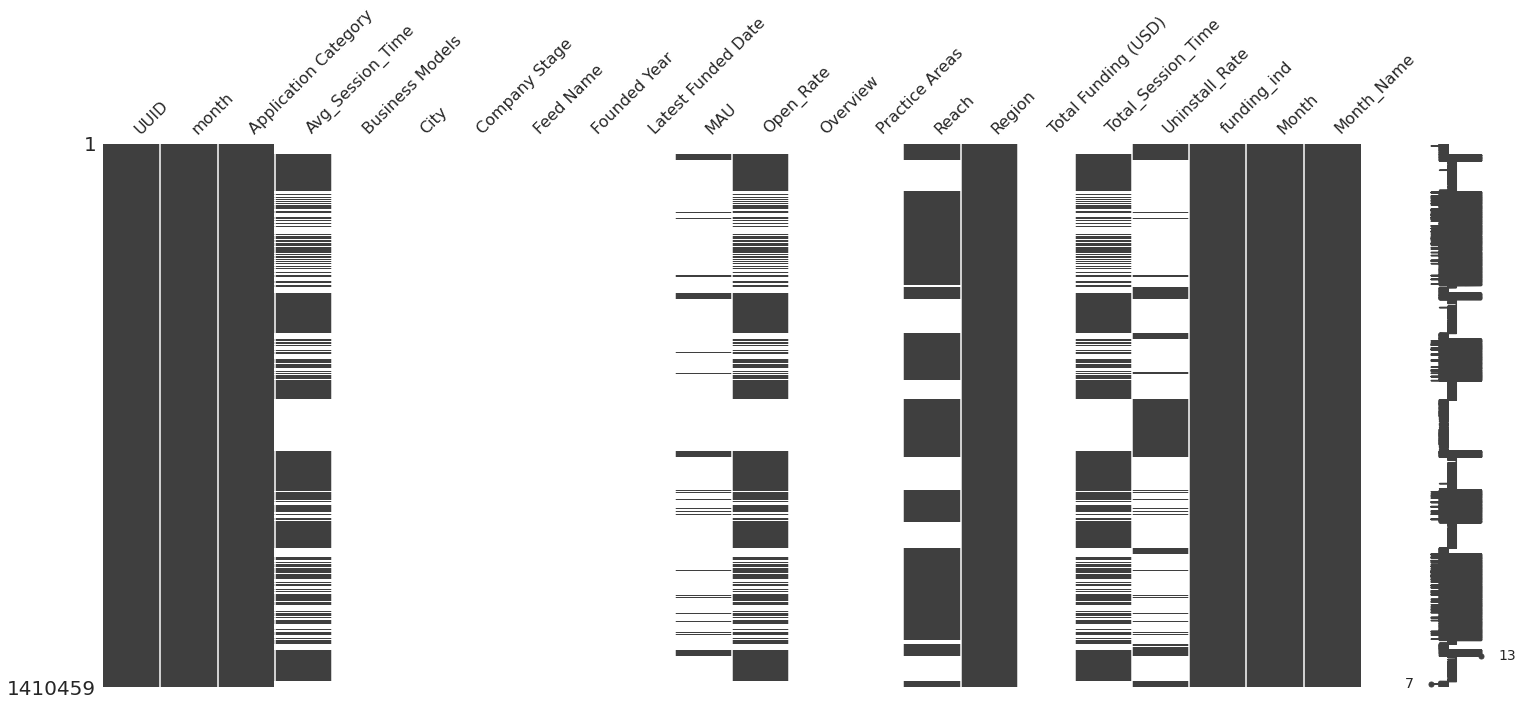

In [ ]:
import missingno as msno
msno.matrix(not_funded_df)

## Redundant Columns With 99.9 % missing values for non funded start-ups

In [ ]:
not_funded_df.drop(['Business Models',
'City',
'Company Stage','Feed Name',
'Founded Year',
'Latest Funded Date',
'MAU',
'Overview',
'Practice Areas','Total Funding (USD)'
], axis = 1, inplace = True)

## Lets analyse Indivisual startup that is funded in the recent time

In [ ]:
funded_df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month_Name
147,0de5c3fb8362718a71754d77061259c809266dd1,20180801,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000192,National,4087427.0,NaN,0.250000,1,8,Aug
212,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180801,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000703,National,4473029.0,NaN,0.274336,1,8,Aug
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1,8,Aug
2624,9d17e60de4c6bb504d258872b6cc0bffd09de171,20180801,Travel & Local,NaN,Online Travel > Transportation > Train > Onlin...,Bangalore,Seed,Online Travel,2014.0,2018-11-01,NaN,NaN,Online platform to book train tickets in India,Consumer\nTravel and Hospitality Tech,0.995227,National,1156045.0,NaN,NaN,1,8,Aug
3374,7c3e0d6bec30478fb1e04249ac2e13016cf9c8db,20180801,Business,NaN,HRTech > HRMS > Suite > Enterprise\nCross Bord...,Gurgaon,Seed,HRTech\nCross Border - India,1995.0,2018-10-01,NaN,NaN,SaaS based Human Resource Management,Enterprise Applications\nGeo - India Tech,0.000161,National,34444.0,NaN,0.100000,1,8,Aug


In [ ]:
startup_info_df = df.groupby('UUID')['funding_ind','Reach',
                                     'Uninstall_Rate'].sum().reset_index().rename(columns = {'funding_ind':'total_funding_ind',
                                    'Reach':'total_Reach',
          'uninstall_Rate':'total_Uninstall_Rate'})

In [ ]:
# Startup which never got funded
never_funded_startup = '000066f130e3b972364c505c805e2cddee68816d'
# Startup which got funded for only one time
funded_startup_1 = 'ff0e12c5ef5043e6dc8af2da006c45a918db9e79'
# Startup which got funded for 63 times
funded_startup_63 = '34fb5fdd67d01b62867cd3496b1a73f0b8ae82a0'


In [ ]:
never_funded_startup_df = df[df['UUID']==never_funded_startup]
funded_startup_1_df = df[df['UUID']==funded_startup_1]
funded_startup_63_df = df[df['UUID']==funded_startup_63]

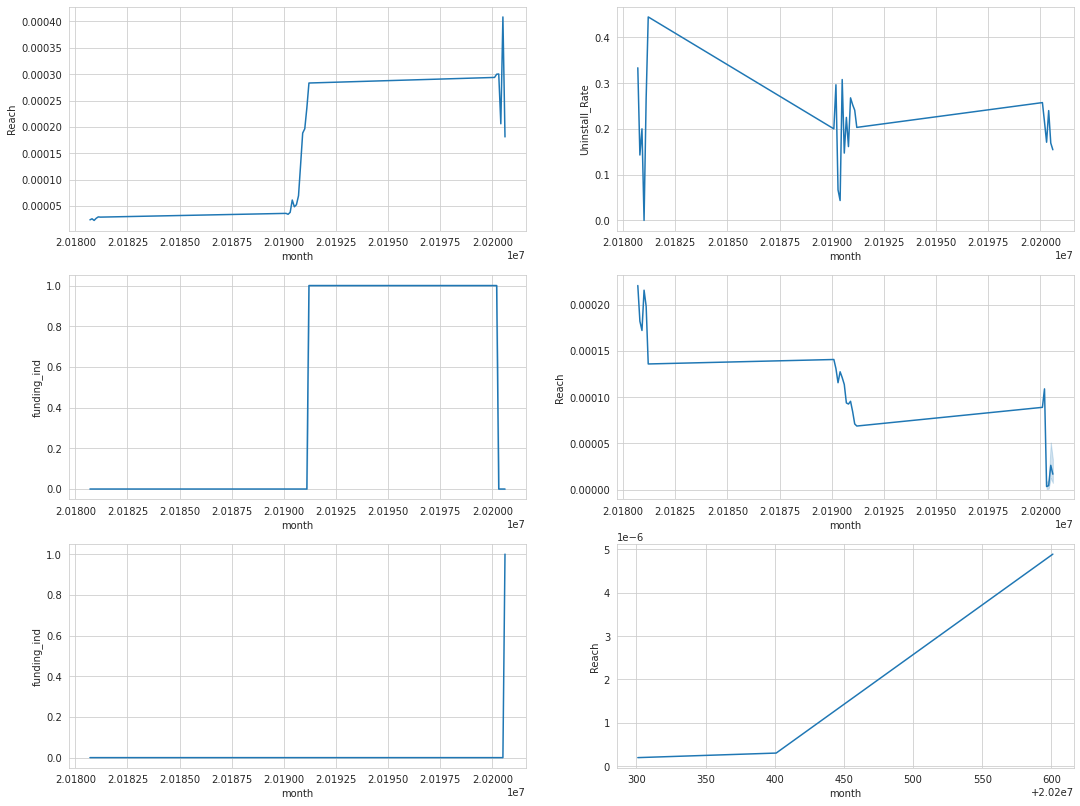

In [ ]:
fig, ax1 = plt.subplots(3,2,figsize=(18,14))
sns.set_style('whitegrid')
ax1=plt.subplot(3, 2,1)
sns.lineplot(funded_startup_1_df['month'], funded_startup_1_df['Reach'])
ax1=plt.subplot(3, 2,2)
sns.lineplot(funded_startup_1_df['month'], funded_startup_1_df['Uninstall_Rate'])
ax1=plt.subplot(3, 2,3)
sns.lineplot(funded_startup_63_df['month'], funded_startup_63_df['funding_ind'])
ax1=plt.subplot(3, 2,4)
sns.lineplot(funded_startup_63_df['month'], funded_startup_63_df['Reach'])
ax1=plt.subplot(3, 2,5)
sns.lineplot(funded_startup_1_df['month'], funded_startup_1_df['funding_ind'])
ax1=plt.subplot(3, 2,6)
sns.lineplot(never_funded_startup_df['month'], never_funded_startup_df['Reach'])
plt.show()

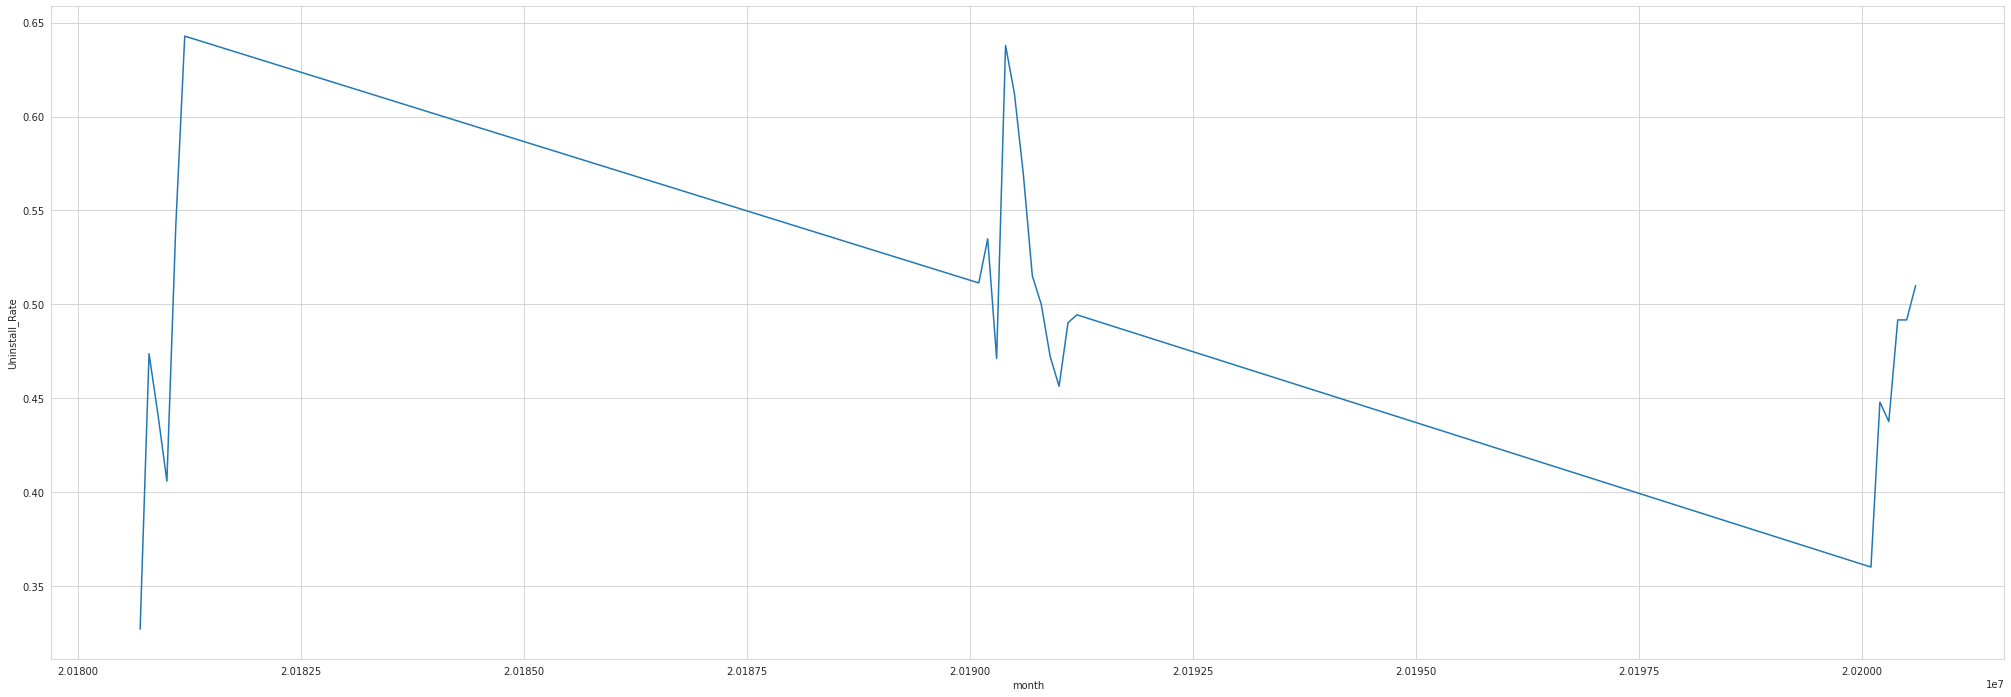

In [ ]:
sns.lineplot(funded_startup_63_df['month'], funded_startup_63_df['Uninstall_Rate'])

In [ ]:
df[df['UUID']==never_funded_startup]

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month_Name
276060,000066f130e3b972364c505c805e2cddee68816d,20200301,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.972088e-07,National,NaN,NaN,NaN,0,3,Mar
611818,000066f130e3b972364c505c805e2cddee68816d,20200601,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.889378e-06,National,NaN,NaN,NaN,0,6,Jun
1257143,000066f130e3b972364c505c805e2cddee68816d,20200401,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.022203e-07,National,NaN,NaN,NaN,0,4,Apr


In [ ]:
Funded_df = df[df['funding_ind']==1]
Non_funded_df = df[df['funding_ind']==0]

In [ ]:
app_traction_features = ['Avg_Session_Time', 'Open_Rate', 'Reach', 'Total_Session_Time']

In [ ]:
# App category that has never recieved funds
never_funded_category = list(set(Non_funded_df['Application Category'].value_counts().index.to_list()) - set(Funded_df['Application Category'].value_counts().index.to_list()))

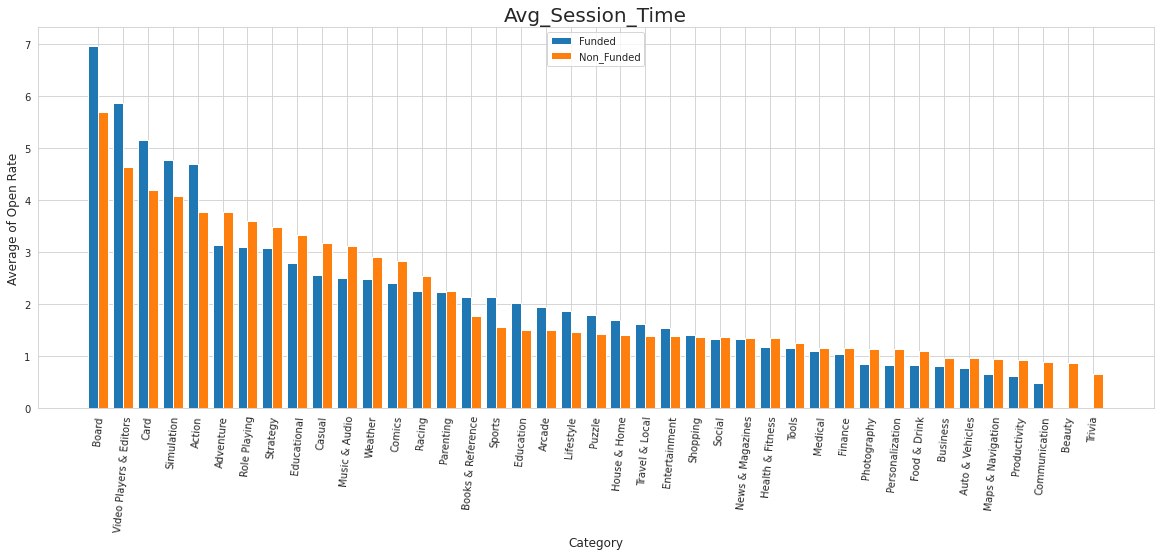

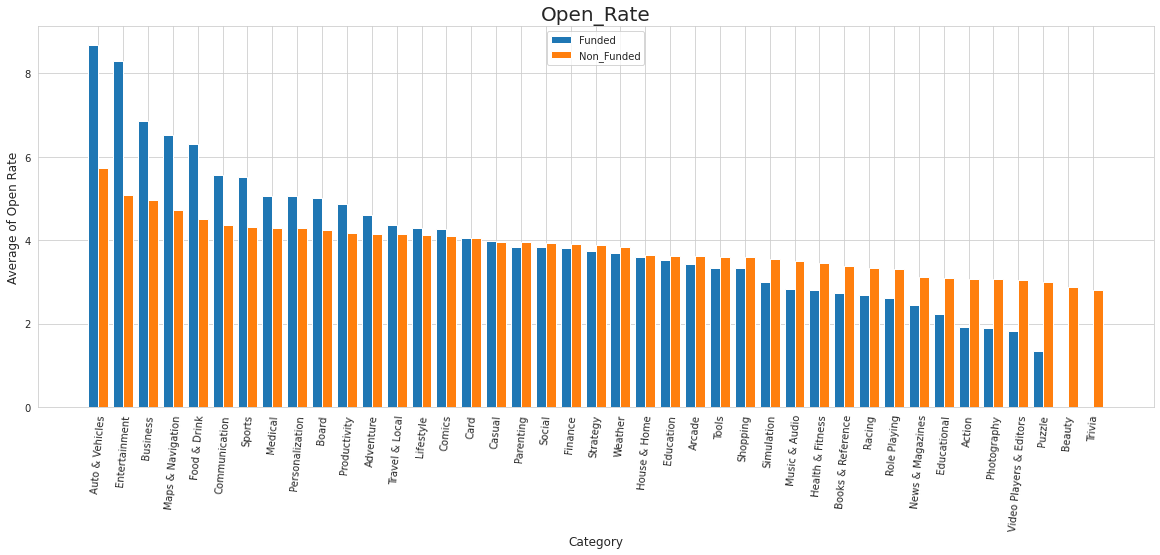

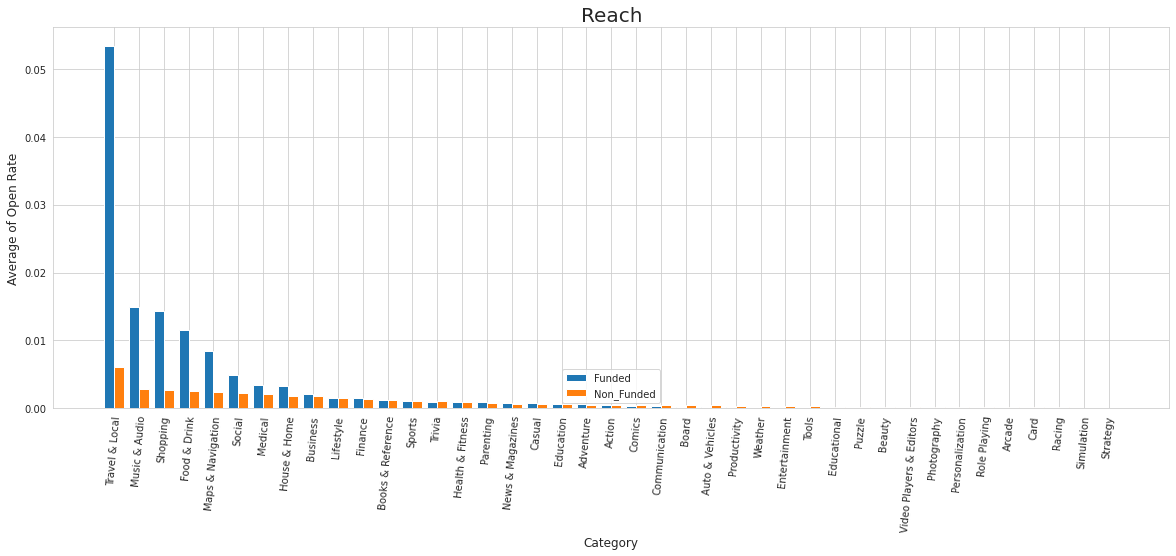

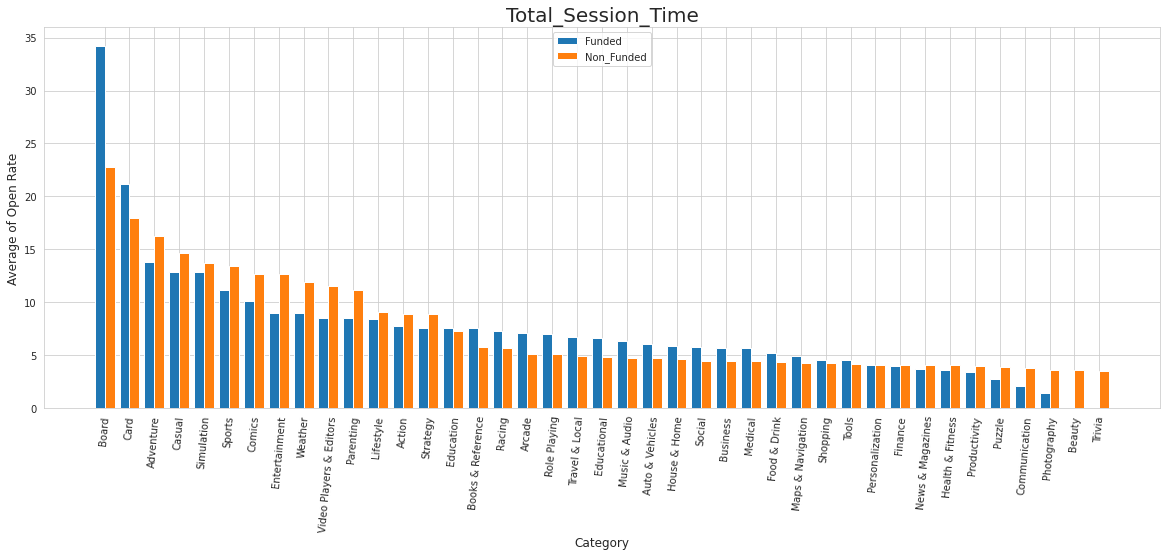

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
for i in app_traction_features:
  w=0.4
  temp = pd.DataFrame(Funded_df.groupby(['Application Category'])[i].mean())
  temp = temp.sort_values([i], ascending=False)
  temp2 = pd.DataFrame(Non_funded_df.groupby(['Application Category'])[i].mean())
  temp2 = temp2.sort_values([i], ascending=False)
  for j in never_funded_category:
    temp2.drop(j, inplace = True)

  bar1 = np.arange(len(temp.index))
  bar2 = [i+w for i in bar1]

  plt.bar(bar1, temp[i], w, label = 'Funded' )
  plt.bar(bar2, temp2[i], w, label = 'Non_Funded' )

  plt.xlabel('Category', fontsize = 12)
  plt.xticks(bar1+w/2, temp.index, rotation=85)
  plt.ylabel('Average of Open Rate', fontsize = 12)
  plt.title(i, fontsize = 20)
  plt.legend()
  plt.show()

**Taking Early Stage Start-Ups only Those which are Looking For (seed funding, Series A, Series B or Series C) Fundings**

In [ ]:
funded_df=df[(df['Company Stage']=="Seed") | (df['Company Stage']=="Series A") | (df['Company Stage']=="Series B")]
Non_funded=df[df['funding_ind']==0]
copy_df=pd.concat([funded_df,Non_funded])


Removing Columns That Doesnot contain information about Non Funded Startups i.e 99% values are missing

In [ ]:
copy_df=copy_df.loc[:,df.isnull().mean()<0.90]

# Missing Value Imputation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
def Imputation(df):
    #first imputing with Interpolation for specific Start up based on the values in corrosponding months
    df=df.pivot_table(index=['UUID','month','Application Category'], aggfunc=np.median).interpolate()
    df = df.reset_index()
    scaler = MinMaxScaler()
    #Now Applying Knn Imputation
    X=scaler.fit_transform(df.drop(columns=['UUID', 'month','Month', 'Application Category','funding_ind']).values)
    imputer = KNNImputer(n_neighbors=2)
    X=imputer.fit_transform(X)
    X=scaler.inverse_transform(X)
    df[['Avg_Session_Time', 'Open_Rate', 'Reach', 'Total_Session_Time', 'Uninstall_Rate']]=X
    return df

In [ ]:
copy_df=Imputation(copy_df)
df=copy_df.copy()

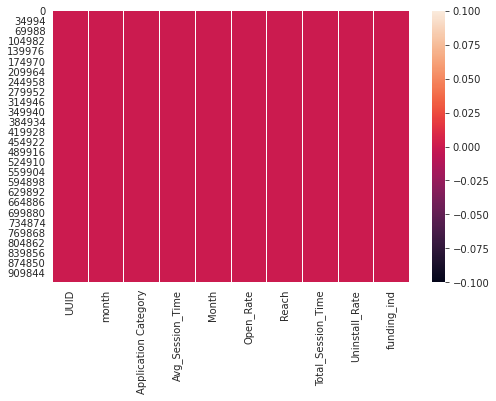

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isna())

Visualising The Trends after imputation

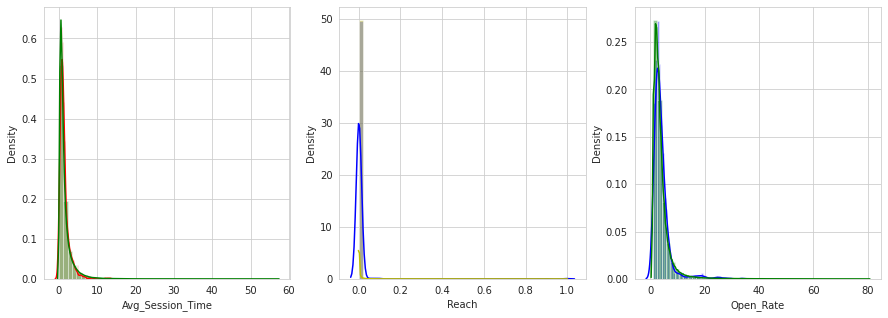

In [ ]:
ax=plt.subplots(1,3,figsize=(15,5))
ax=plt.subplot(1,3,1)
ax=sns.distplot(df[df['funding_ind']==1]['Avg_Session_Time'],hist=True,color='r',label='funded')
ax=sns.distplot(df[df['funding_ind']==0]['Avg_Session_Time'],hist=True,color='g',label='Non_funded')
ax=plt.subplot(1,3,2)
ax=sns.distplot(df[df['funding_ind']==1]['Reach'],hist=True,color='b',label='funded')
ax=sns.distplot(df[df['funding_ind']==0]['Reach'],hist=True,color='y',label='Non_funded')
ax=plt.subplot(1,3,3)
ax=sns.distplot(df[df['funding_ind']==1]['Open_Rate'],hist=True,color='b',label='funded')
ax=sns.distplot(df[df['funding_ind']==0]['Open_Rate'],hist=True,color='g',label='Non_funded')

In [ ]:
clean_df=df.copy()


Shifting The Features From Past For prediction


In [ ]:
def get_previous_records(columns, data):
  for elem in columns:
    data[f'{elem}_3'] = data[elem].shift(periods=3)
    data[f'{elem}_2']= data[elem].shift(periods=2)
    data[f'{elem}_1']= data[elem].shift(periods=1)

    data=data[(data['UUID_1']==data['UUID']) & (data['UUID_2']==data["UUID"]) & (data['UUID_3']==data["UUID"])]
    
  data.drop(['UUID_1','UUID_2', 'UUID_3'], axis =1 , inplace = True)
  return data

In [ ]:
clean_df = get_previous_records(['UUID', 'Open_Rate', 'Avg_Session_Time', 'Reach', 'Total_Session_Time', 'Uninstall_Rate'], clean_df)

# Target Variable

In [ ]:
def Target_variable3_mont(clean_df,columns):
    for elem in columns:
        clean_df[f'{elem}_3']=clean_df[elem].shift(periods=-3)
        clean_df[f'{elem}_2']=clean_df[elem].shift(periods=-2)
        clean_df[f'{elem}_1']=clean_df[elem].shift(periods=-1)
    clean_df['Total_funding_ind'] = clean_df['funding_ind_1'] + clean_df['funding_ind_2'] + clean_df['funding_ind_3']
    clean_df['Target'] = clean_df['Total_funding_ind'].apply(lambda x : 1 if x > 0 else 0)

    clean_df=clean_df[(clean_df['UUID_1']==clean_df['UUID']) & (clean_df['UUID_2']==clean_df["UUID"]) & (clean_df['UUID_3']==clean_df["UUID"])]
    
    clean_df.drop(['UUID_1','UUID_2', 'UUID_3'], axis =1 , inplace = True)

    clean_df.drop(['Total_funding_ind','funding_ind_1','funding_ind_2','funding_ind_3'], axis = 1, inplace = True)
    return clean_df

In [ ]:
clean_df = Target_variable3_mont(clean_df,['UUID', 'funding_ind'])

In [ ]:
clean_df['Target'].value_counts()

0    400226
1       892
Name: Target, dtype: int64

In [ ]:
def Weighted_Timeperiod_variables(clean_df,columns):
    for elem in columns:
        clean_df[f'{elem}_wt']=(clean_df[f'{elem}_{1}']*(3/6))+(clean_df[f'{elem}_{2}']*(2/6))+(clean_df[f'{elem}_{3}']*(1/6))
    return clean_df


In [ ]:
features=['Avg_Session_Time','Reach','Uninstall_Rate','Open_Rate','Total_Session_Time']
clean_df=Weighted_Timeperiod_variables(clean_df,features)

In [ ]:
rename = {'Open_Rate': 'Current_Open_Rate', 'Total_Session_Time' : 'Current_Total_Session_Time', 'Avg_Session_Time': 'Current_Avg_Session_Time',
          'Reach': 'Current_Reach', 'Uninstall_Rate': 'Current_Uninstall_Rate', 'funding_ind' : 'Current_funding_ind',
          'Total Funding (USD)' :'Current_Total Funding (USD)'}

In [ ]:
clean_df = clean_df.rename(columns = rename)

# Feature Engineering

In [ ]:
temp = clean_df.copy()

In [ ]:
def dominance_eval(columns, data):
  for col in columns:
    data = data.join(data.groupby('Application Category')[col].sum(), on='Application Category', rsuffix='_sum')
    data[f'dominance_in_{col}'] = data[col]/data[f'{col}_sum']
    data.drop(f'{col}_sum', axis = 1, inplace = True)
  
  
  return data

In [ ]:
clean_df = dominance_eval(['Current_Open_Rate', 'Current_Total_Session_Time', 'Current_Avg_Session_Time', 'Current_Reach', 'Current_Uninstall_Rate' ], clean_df)

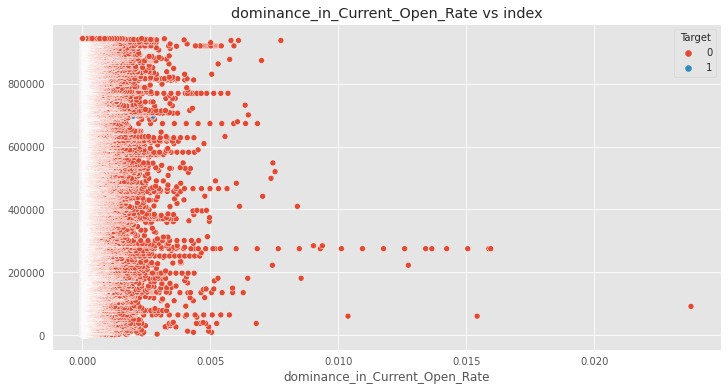

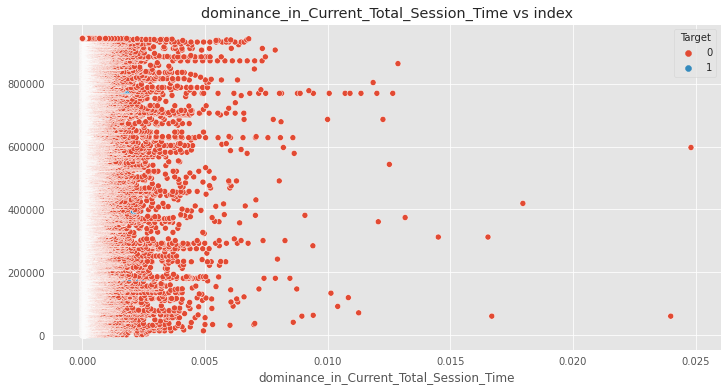

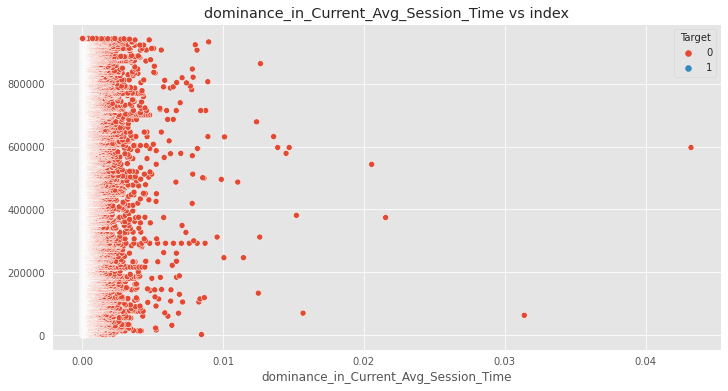

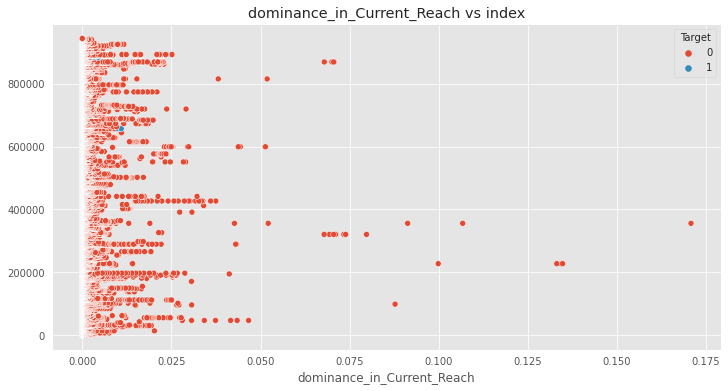

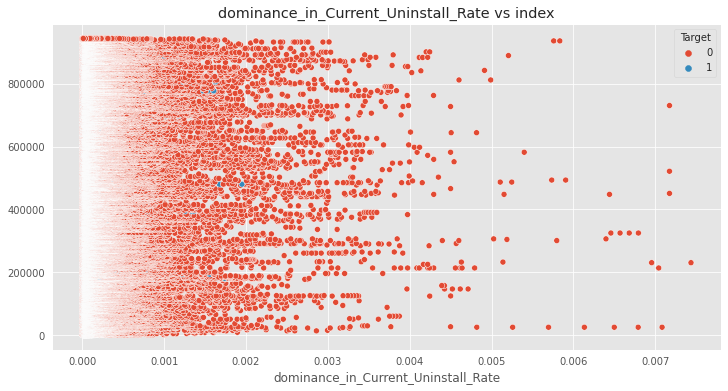

In [ ]:
plt.style.use('ggplot')

for i,col in enumerate(list(clean_df.columns)[-5:]):
  plt.figure(i,figsize=(12,6))
  sns.scatterplot(x= clean_df[col],y=clean_df.index, hue = clean_df['Target'])
  plt.title(f'{col} vs index')

# Dominance in current open rate and dominance in current reach seems to be good predictors

In [ ]:
clean_df.head()

,UUID,month,Application Category,Current_Avg_Session_Time,Month,Current_Open_Rate,Current_Reach,Current_Total_Session_Time,Current_Uninstall_Rate,Current_funding_ind,Open_Rate_3,Open_Rate_2,Open_Rate_1,Avg_Session_Time_3,Avg_Session_Time_2,Avg_Session_Time_1,Reach_3,Reach_2,Reach_1,Total_Session_Time_3,Total_Session_Time_2,Total_Session_Time_1,Uninstall_Rate_3,Uninstall_Rate_2,Uninstall_Rate_1,Target,Avg_Session_Time_wt,Reach_wt,Uninstall_Rate_wt,Open_Rate_wt,Total_Session_Time_wt,dominance_in_Current_Open_Rate,dominance_in_Current_Total_Session_Time,dominance_in_Current_Avg_Session_Time,dominance_in_Current_Reach,dominance_in_Current_Uninstall_Rate
24,00033006be474a18f422eb285da9b761023b09e1,20200201,Entertainment,1.048538,2,4.401628,0.000025,4.544112,0.168361,0,8.500000,1.000000,3.166667,1.589457,0.829983,1.179251,0.000003,0.000020,0.000015,17.200417,0.829983,3.686958,0.097565,0.039087,0.063712,0,1.131196,0.000015,0.061146,3.333333,4.986876,0.000058,0.000045,0.000036,4.957351e-07,0.000054
25,00033006be474a18f422eb285da9b761023b09e1,20200301,Entertainment,1.138207,3,4.229853,0.000031,4.742779,0.050808,0,1.000000,3.166667,4.401628,0.829983,1.179251,1.048538,0.000020,0.000015,0.000025,0.829983,3.686958,4.544112,0.039087,0.063712,0.168361,0,1.055683,0.000021,0.111932,3.423036,3.639372,0.000056,0.000047,0.000039,6.186773e-07,0.000016
34,00049a5ac8ad7f56096e9c4d1c75b682080b548e,20180801,Video Players & Editors,1.061832,8,4.467213,0.000097,4.384317,0.083333,0,3.905634,3.374384,3.511173,1.168498,1.166726,1.106371,0.000044,0.000092,0.000108,4.431994,3.518272,3.701186,0.069575,0.087928,0.014411,0,1.136844,0.000092,0.048111,3.531320,3.762016,0.000108,0.000081,0.000082,9.128210e-06,0.000063
35,00049a5ac8ad7f56096e9c4d1c75b682080b548e,20180901,Music & Audio,1.054408,9,4.626553,0.003667,4.498173,0.065173,0,3.374384,3.511173,4.467213,1.166726,1.106371,1.061832,0.000092,0.000108,0.000097,3.518272,3.701186,4.384317,0.087928,0.014411,0.083333,0,1.094161,0.000100,0.061125,3.966395,4.012266,0.000081,0.000065,0.000057,1.922322e-04,0.000038
36,00049a5ac8ad7f56096e9c4d1c75b682080b548e,20180901,Video Players & Editors,1.046985,9,4.785893,0.000078,4.612028,0.157895,0,3.511173,4.467213,4.626553,1.106371,1.061832,1.054408,0.000108,0.000097,0.003667,3.701186,4.384317,4.498173,0.014411,0.083333,0.065173,0,1.065543,0.001884,0.062766,4.387543,4.327390,0.000116,0.000085,0.000081,7.290690e-06,0.000120


In [ ]:
clean_df['Average user'] = clean_df['Current_Avg_Session_Time']*clean_df['Current_Open_Rate'] / clean_df['Current_Total_Session_Time']

In [ ]:
for col in ['Open_Rate', 'Total_Session_Time', 'Avg_Session_Time', 'Reach', 'Uninstall_Rate']:
  clean_df[f'Average of {col}'] = clean_df[[f'{col}_1',f'{col}_2',f'{col}_3']].mean(axis = 1)

In [ ]:
clean_df.head()

,UUID,month,Application Category,Current_Avg_Session_Time,Month,Current_Open_Rate,Current_Reach,Current_Total_Session_Time,Current_Uninstall_Rate,Current_funding_ind,Open_Rate_3,Open_Rate_2,Open_Rate_1,Avg_Session_Time_3,Avg_Session_Time_2,Avg_Session_Time_1,Reach_3,Reach_2,Reach_1,Total_Session_Time_3,Total_Session_Time_2,Total_Session_Time_1,Uninstall_Rate_3,Uninstall_Rate_2,Uninstall_Rate_1,Target,Avg_Session_Time_wt,Reach_wt,Uninstall_Rate_wt,Open_Rate_wt,Total_Session_Time_wt,dominance_in_Current_Open_Rate,dominance_in_Current_Total_Session_Time,dominance_in_Current_Avg_Session_Time,dominance_in_Current_Reach,dominance_in_Current_Uninstall_Rate,Average user,Average of Open_Rate,Average of Total_Session_Time,Average of Avg_Session_Time,Average of Reach,Average of Uninstall_Rate
24,00033006be474a18f422eb285da9b761023b09e1,20200201,Entertainment,1.048538,2,4.401628,0.000025,4.544112,0.168361,0,8.500000,1.000000,3.166667,1.589457,0.829983,1.179251,0.000003,0.000020,0.000015,17.200417,0.829983,3.686958,0.097565,0.039087,0.063712,0,1.131196,0.000015,0.061146,3.333333,4.986876,0.000058,0.000045,0.000036,4.957351e-07,0.000054,1.015661,4.222222,7.239119,1.199564,0.000013,0.066788
25,00033006be474a18f422eb285da9b761023b09e1,20200301,Entertainment,1.138207,3,4.229853,0.000031,4.742779,0.050808,0,1.000000,3.166667,4.401628,0.829983,1.179251,1.048538,0.000020,0.000015,0.000025,0.829983,3.686958,4.544112,0.039087,0.063712,0.168361,0,1.055683,0.000021,0.111932,3.423036,3.639372,0.000056,0.000047,0.000039,6.186773e-07,0.000016,1.015111,2.856098,3.020351,1.019258,0.000020,0.090387
34,00049a5ac8ad7f56096e9c4d1c75b682080b548e,20180801,Video Players & Editors,1.061832,8,4.467213,0.000097,4.384317,0.083333,0,3.905634,3.374384,3.511173,1.168498,1.166726,1.106371,0.000044,0.000092,0.000108,4.431994,3.518272,3.701186,0.069575,0.087928,0.014411,0,1.136844,0.000092,0.048111,3.531320,3.762016,0.000108,0.000081,0.000082,9.128210e-06,0.000063,1.081908,3.597064,3.883817,1.147198,0.000081,0.057305
35,00049a5ac8ad7f56096e9c4d1c75b682080b548e,20180901,Music & Audio,1.054408,9,4.626553,0.003667,4.498173,0.065173,0,3.374384,3.511173,4.467213,1.166726,1.106371,1.061832,0.000092,0.000108,0.000097,3.518272,3.701186,4.384317,0.087928,0.014411,0.083333,0,1.094161,0.000100,0.061125,3.966395,4.012266,0.000081,0.000065,0.000057,1.922322e-04,0.000038,1.084502,3.784257,3.867925,1.111643,0.000099,0.061891
36,00049a5ac8ad7f56096e9c4d1c75b682080b548e,20180901,Video Players & Editors,1.046985,9,4.785893,0.000078,4.612028,0.157895,0,3.511173,4.467213,4.626553,1.106371,1.061832,1.054408,0.000108,0.000097,0.003667,3.701186,4.384317,4.498173,0.014411,0.083333,0.065173,0,1.065543,0.001884,0.062766,4.387543,4.327390,0.000116,0.000085,0.000081,7.290690e-06,0.000120,1.086455,4.201646,4.194558,1.074204,0.001291,0.054306


In [ ]:
def percentage_change(column_list , data):
  for col in column_list:
      data[f'Perecentage_change_{col}1'] = ((data[f'Current_{col}'] - data[f'{col}_1'])/data[f'Current_{col}'])
      for i in range(2,4):
        data[f'Perecentage_change_{col}_{i}'] = ((data[f'{col}_{i}'] - data[f'{col}_{i-1}'])/data[f'{col}_{i}'])

  return data

In [ ]:
import math
def zero_crossing(asc):
  asc = [a for a in asc if not math.isnan(a)]
  shifted = np.array(asc) - np.mean(asc) 
  return ((shifted[:-1] * shifted[1:]) < 0).sum()


def unstability(df,cols):
  a = df[['UUID','month']+cols].sort_values('month').groupby('UUID').agg(list)
  dod = {}
  for col in cols:
    zc = a[col].apply(zero_crossing)
    dod[col+'_unstability'] = zc.to_dict()
  return pd.DataFrame(dod)

features=['Current_Total_Session_Time', 'Current_Open_Rate', 'Current_Reach',
 'Current_Uninstall_Rate', 'Current_Avg_Session_Time']
dod = unstability(clean_df,features)

for col in list(dod.columns):
  clean_df[col] = clean_df['UUID'].apply(lambda x :  dod.loc[x,col])


In [ ]:
# features=['Current_Total_Session_Time', 'Current_Open_Rate', 'Current_Reach',
#  'Current_Uninstall_Rate', 'Current_Avg_Session_Time']
# stability(clean_df,features)

In [ ]:
clean_df = percentage_change(['Open_Rate', 'Total_Session_Time', 'Avg_Session_Time', 'Reach', 'Uninstall_Rate'], clean_df)

In [ ]:
def app_cat(funding_column,Application_Category, data):
  a,b = np.unique(data[data[funding_column] == 1][Application_Category],return_counts=True)
  never_funded_app_cat = list(set(data[Application_Category]) - set(data[data[funding_column] == 1][Application_Category]))
  b = b/sum(b)
  rep_dict = dict(zip(a,b))
  rep_dict.update(dict(zip(never_funded_app_cat,[0]*len(never_funded_app_cat))))
  data[Application_Category] = data[Application_Category].replace(rep_dict)

  return data

In [ ]:
clean_df = app_cat( 'Current_funding_ind', 'Application Category', clean_df)

Adding WEighted columns

In [ ]:
clean_df.drop(columns=['Average user','Avg_Session_Time_3',
       'Avg_Session_Time_2', 'Avg_Session_Time_1',  'Open_Rate_3',
       'Open_Rate_2', 'Open_Rate_1', 'Reach_3', 'Reach_2', 'Reach_1',
       'Total_Session_Time_3', 'Total_Session_Time_2', 'Total_Session_Time_1',
       'Uninstall_Rate_3', 'Uninstall_Rate_2', 'Uninstall_Rate_1',
       'Average of Open_Rate', 'Average of Total_Session_Time',
       'Average of Avg_Session_Time', 'Average of Reach','Current_Avg_Session_Time',
      'Current_Open_Rate','Current_Reach', 'Current_Total_Session_Time',
       'Current_Uninstall_Rate', 'Month',
       'Average of Uninstall_Rate'],axis=1,inplace=True)

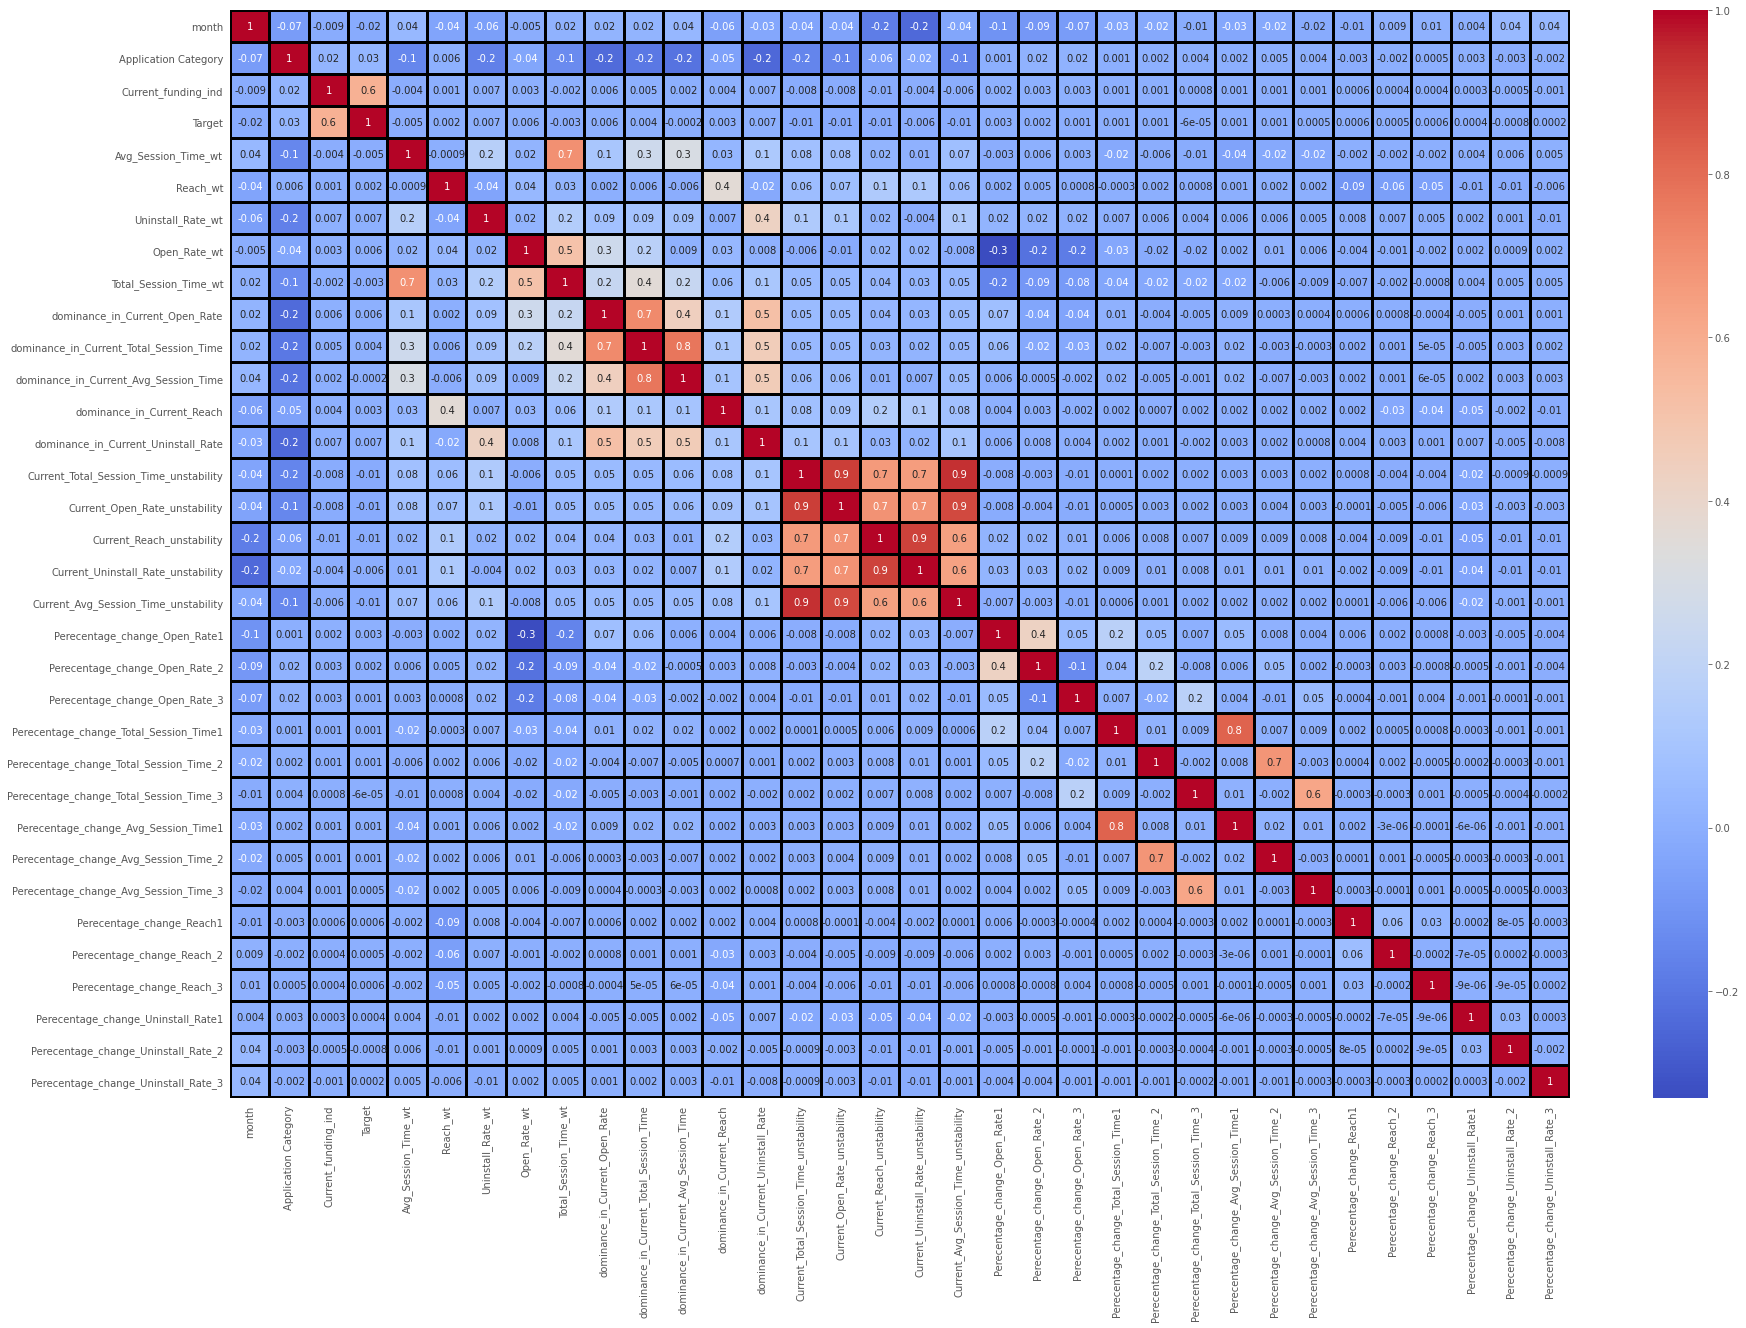

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(clean_df.corr(),annot=True,cmap='coolwarm',linewidths=2,fmt='.1g', linecolor='black')

In [ ]:
clean_df.columns

Index(['UUID', 'month', 'Application Category', 'Current_funding_ind',
       'Target', 'Avg_Session_Time_wt', 'Reach_wt', 'Uninstall_Rate_wt',
       'Open_Rate_wt', 'Total_Session_Time_wt',
       'dominance_in_Current_Open_Rate',
       'dominance_in_Current_Total_Session_Time',
       'dominance_in_Current_Avg_Session_Time', 'dominance_in_Current_Reach',
       'dominance_in_Current_Uninstall_Rate',
       'Current_Total_Session_Time_unstability',
       'Current_Open_Rate_unstability', 'Current_Reach_unstability',
       'Current_Uninstall_Rate_unstability',
       'Current_Avg_Session_Time_unstability', 'Perecentage_change_Open_Rate1',
       'Perecentage_change_Open_Rate_2', 'Perecentage_change_Open_Rate_3',
       'Perecentage_change_Total_Session_Time1',
       'Perecentage_change_Total_Session_Time_2',
       'Perecentage_change_Total_Session_Time_3',
       'Perecentage_change_Avg_Session_Time1',
       'Perecentage_change_Avg_Session_Time_2',
       'Perecentage_change_Avg_

In [ ]:
df=clean_df.copy()

[Text(0.5, 0, 'Current Open Rate Instability')]

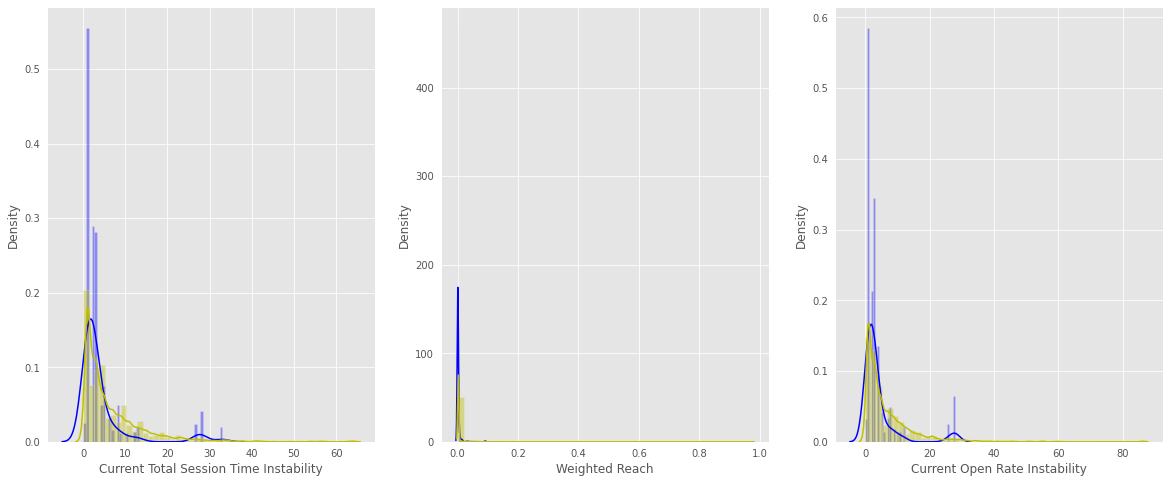

In [ ]:
ax=plt.subplots(1,3,figsize=(20,8))
ax=plt.subplot(1,3,1)
ax=sns.distplot(df[df['Target']==1]['Current_Total_Session_Time_unstability'],hist=True,color='b',label='funded')
ax=sns.distplot(df[df['Target']==0]['Current_Total_Session_Time_unstability'],hist=True,color='y',label='Non_funded')
ax. set(xlabel='Current Total Session Time Instability')
ax=plt.subplot(1,3,2)
ax=sns.distplot(df[df['Target']==1]['Reach_wt'],hist=True,color='b',label='funded')
ax=sns.distplot(df[df['Target']==0]['Reach_wt'],hist=True,color='y',label='Non_funded')
ax. set(xlabel='Weighted Reach')
ax=plt.subplot(1,3,3)
ax=sns.distplot(df[df['Target']==1]['Current_Open_Rate_unstability'],hist=True,color='b',label='funded')
ax=sns.distplot(df[df['Target']==0]['Current_Open_Rate_unstability'],hist=True,color='y',label='Non_funded')
ax. set(xlabel='Current Open Rate Instability')

# <b>Feature Description </b>:

*   Current_funding_ind :--- Indicates whether a startup is funded in the current month
*   Current Reach, Open rate, Uninstall rate, Avg_Session_time, Total_Session_time :--- Indicates the current month app traction values.
*   Open_rate 1, 2, 3 :--- Previous 3 month's open rate
*   Reach 1, 2, 3 :--- Previous 3 month's Reach
*   Uninstall rate 1, 2, 3 :--- Previous 3 month's uninstall rate
*   Avg_Session_time 1, 2, 3 :--- Previous 3 month's Avg_Session_time
*   Total_Session_time 1, 2, 3 :--- Previous 3 month's Total_Session_time
*   dominance_in_Current Reach, Open rate, Uninstall rate, Avg_Session_time, Total_Session_time :---- Dominance on Application Category over other competitors. Dominace_in_Avg_Session_time = (Avg_Session_time)/(Sum of Avg_Session_time groupedby Application category)

*   percentage_change_Reach 1/2/3 , Open rate 1/2/3, Uninstall rate 1/2/3, Avg_Session_time 1/2/3, Total_Session_time 1/2/3 :---- Percentage change in each app traction records w.rt its previous recorded month

**Stability Through out any Start_up** we took measure of stability for any start_up
___________________


In [ ]:
final_df = clean_df.copy()

In [ ]:
final_df=final_df.replace([np.inf, -np.inf], np.nan)
final_df = final_df.dropna()

# Modelling

In [ ]:
final_df.Target.value_counts()

0    380888
1       845
Name: Target, dtype: int64

Undersampling non funded startups to reduce the cost of Algorithms

In [ ]:
Non_funded_df=final_df[final_df.Target==0].sample(frac=0.25, random_state=1)
funded_df=final_df[final_df.Target==1]


In [ ]:
final_df=pd.concat([Non_funded_df,funded_df])

In [ ]:
final_df.columns

Index(['UUID', 'month', 'Application Category', 'Current_funding_ind',
       'Target', 'Avg_Session_Time_wt', 'Reach_wt', 'Uninstall_Rate_wt',
       'Open_Rate_wt', 'Total_Session_Time_wt',
       'dominance_in_Current_Open_Rate',
       'dominance_in_Current_Total_Session_Time',
       'dominance_in_Current_Avg_Session_Time', 'dominance_in_Current_Reach',
       'dominance_in_Current_Uninstall_Rate',
       'Current_Total_Session_Time_unstability',
       'Current_Open_Rate_unstability', 'Current_Reach_unstability',
       'Current_Uninstall_Rate_unstability',
       'Current_Avg_Session_Time_unstability', 'Perecentage_change_Open_Rate1',
       'Perecentage_change_Open_Rate_2', 'Perecentage_change_Open_Rate_3',
       'Perecentage_change_Total_Session_Time1',
       'Perecentage_change_Total_Session_Time_2',
       'Perecentage_change_Total_Session_Time_3',
       'Perecentage_change_Avg_Session_Time1',
       'Perecentage_change_Avg_Session_Time_2',
       'Perecentage_change_Avg_

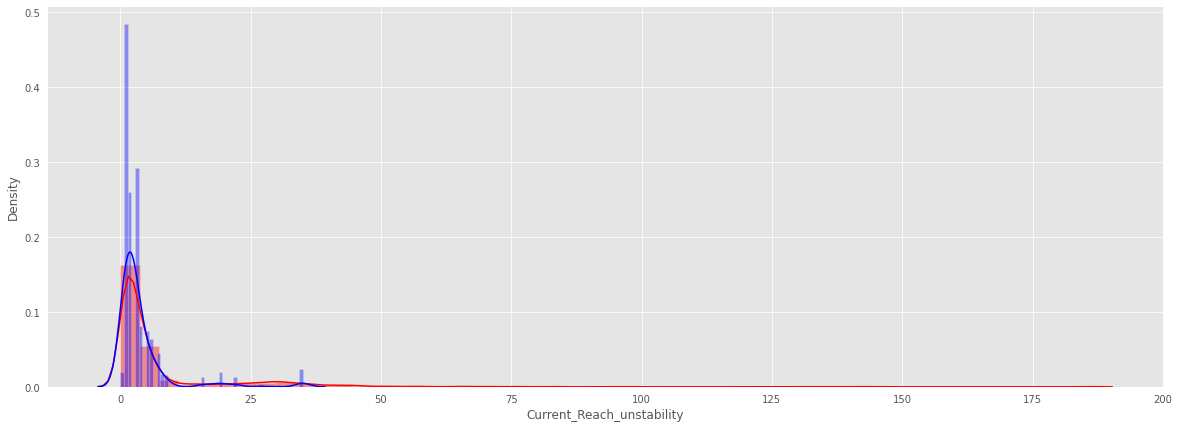

In [ ]:
sns.distplot(final_df[final_df['Target']==0]['Current_Reach_unstability'],label="Funded",color='r')
sns.distplot(final_df[final_df['Target']==1]['Current_Reach_unstability'],label="Non_Funded",color='b')

In [ ]:
final_df.drop(columns=['UUID','month'],inplace=True)

In [ ]:
final_df.Target.value_counts()

0    95222
1      845
Name: Target, dtype: int64

In [ ]:
X = final_df.drop('Target', axis = 1).values
y = final_df['Target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
# fit predictor and target variable
x_smote,y_smote  = smote.fit_resample(X_train, y_train)
x_smote=pd.DataFrame(x_smote,columns=final_df.drop('Target',axis=1).columns.to_list())
y_smote=pd.Series(y_smote)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
xgb= XGBClassifier(objective = 'binary:logistic',
    nthread=4,
    eta = 0.1,
    num_boost_round = 80,
    max_depth = 5,
    subsample = 0.5,
    colsample_bytree = 1.0,
    silent = 1,
    )

parameters = {
    'n_estimators': [400,500,100],
   # 'weights' :[ 90, 99],
    'num_boost_round': [ 25],
    'max_depth': [ 4, 5],
    'colsample_bytree': [0.9, 1.0],
     'gpu_id': [0],
    # 'tree_method':['gpu_hist'],
    # 'updater': ['grow_gpu']
}

In [ ]:
grid = RandomizedSearchCV(xgb, parameters, cv=2,n_jobs=8, scoring='roc_auc',verbose=2)

In [ ]:
XgbEval=grid.fit(x_smote, y_smote)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 out of  20 | elapsed:  9.1min remaining:  2.3min
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed: 11.7min finished


In [ ]:
from sklearn.metrics import *

In [ ]:
best_prams=XgbEval.best_estimator_
X_train=pd.DataFrame(X_train,columns=final_df.drop('Target',axis=1).columns.to_list())
y_pred_train=best_prams.predict(X_train)
print(confusion_matrix(y_train,y_pred_train))
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred_train)))
print(classification_report(y_train,y_pred_train))

[[66623    32]
 [   32   559]]
Accuracy Score 0.9990482705291021
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66655
           1       0.95      0.95      0.95       591

    accuracy                           1.00     67246
   macro avg       0.97      0.97      0.97     67246
weighted avg       1.00      1.00      1.00     67246



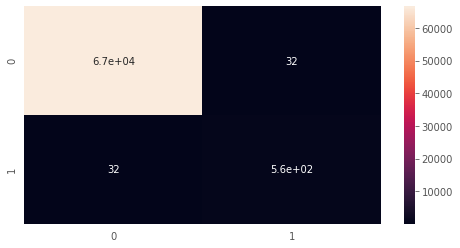

In [ ]:
plt.figure(figsize=(8,4))
plt.xlabel("Predicted")
plt.ylabel("Actual")
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True)

In [ ]:
best_prams=XgbEval.best_estimator_
X_test=pd.DataFrame(X_test,columns=final_df.drop('Target',axis=1).columns.to_list())
y_pred=best_prams.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[28532    35]
 [  108   146]]
Accuracy Score 0.9950383400992332
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28567
           1       0.81      0.57      0.67       254

    accuracy                           1.00     28821
   macro avg       0.90      0.79      0.83     28821
weighted avg       0.99      1.00      0.99     28821



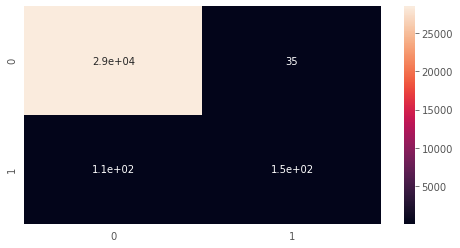

In [ ]:
plt.figure(figsize=(8,4))
plt.xlabel("Predicted")
plt.ylabel("Actual")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
features = final_df.drop(columns=['Target']).columns
importances = best_prams.feature_importances_
indices = np.argsort(importances)

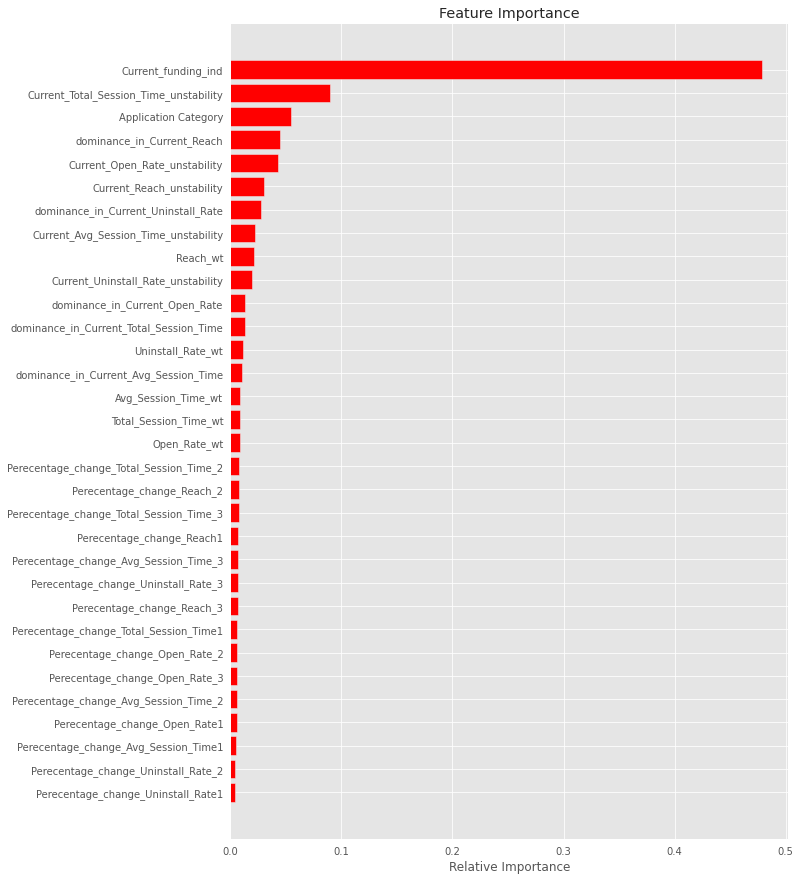

In [ ]:
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Without taking Funding Indicator 

In [ ]:
X = final_df.drop(columns=['Target','Current_funding_ind']).values
y = final_df['Target'].values

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
x_smote,y_smote  = smote.fit_resample(X_train, y_train)
x_smote=pd.DataFrame(x_smote,columns=final_df.drop(columns=['Target','Current_funding_ind']).columns.to_list())
y_smote=pd.Series(y_smote)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
xgb= XGBClassifier(scale_pos_weight=99,objective = 'binary:logistic',
    nthread=4,
    eta = 0.1,
    num_boost_round = 80,
    max_depth = 5,
    subsample = 0.5,
    colsample_bytree = 1.0,
    silent = 1,
    )

parameters = {
    'n_estimators': [400,500,100],
    'weights' :[ 99, 75, ],
    'num_boost_round': [ 25],
    'max_depth': [ 4, 5],
    'colsample_bytree': [0.9, 1.0],
     'gpu_id': [0],
    #'tree_method':['gpu_exact'],
    #'updater': ['grow_gpu']
}

In [ ]:
grid = RandomizedSearchCV(xgb, parameters, cv=2,n_jobs=8, scoring='roc_auc',verbose=2)

In [ ]:
XgbEval=grid.fit(x_smote, y_smote)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 out of  20 | elapsed: 11.4min remaining:  2.9min
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed: 12.0min finished


In [ ]:
x_smote.shape

(127596, 31)

In [ ]:
features = final_df.drop(columns=['Target','Current_funding_ind']).columns
importances = best_prams.feature_importances_
indices = np.argsort(importances)

In [ ]:
 best_prams=XgbEval.best_estimator_
X_test=pd.DataFrame(X_test,columns=x_smote.columns.to_list())
y_pred=best_prams.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[30461   963]
 [   94   185]]
Accuracy Score 0.9666593066902186
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     31424
           1       0.16      0.66      0.26       279

    accuracy                           0.97     31703
   macro avg       0.58      0.82      0.62     31703
weighted avg       0.99      0.97      0.98     31703



In [ ]:
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()